Assignment 1

1) 
    k = 1
    - Nearest neightbor is of class "Chinstrap", distance 1.3
    - Therefore, the penquin is classified as "Chinstrap".

    k = 3
    - 3 nearest neighbors are:
        - Chinstrap, distance 1.3
        - Chinstrap, distance 1.6
        - Gentoo, distance 1.9
    - Because "Chinestrap" appears more, the penguin is classified as "Chinstrap".

    k = 5
    - 5 nearst neighbors are:
        - Chinstrap, distance 1.3
        - Chinstrap, distance 1.6
        - Gentoo, distance 1.9
        - Gentoo, distance 2.3
        - Chinstrap, distance 2.4
    - Because "Chinstrap" appears 3 times, and "Gentoo" appears 2 times,the penguin is classified as "Chinstrap"

2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings
warnings.simplefilter('ignore', np.exceptions.RankWarning)


Coefficients: [0.00949133 2.03930393]
Training Cost: 0.10463481642019379
Validation Cost: 0.18240178712130306


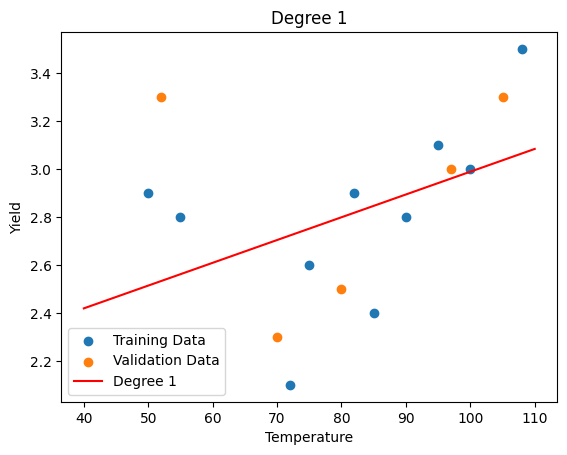

Coefficients: [-1.27638775e-05  3.85701938e-03 -3.51035040e-01  1.24563531e+01]
Training Cost: 0.035146827935118766
Validation Cost: 0.04602546697787343


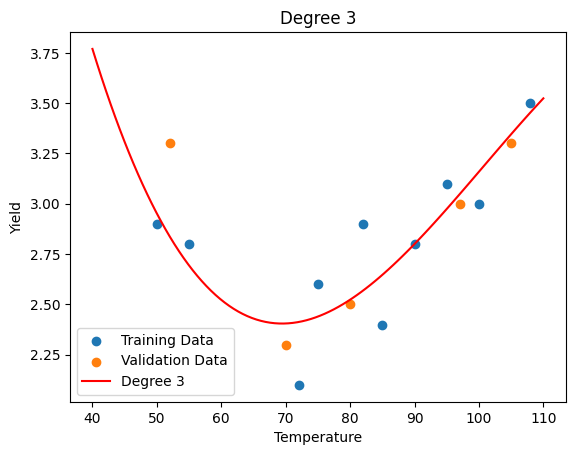

Coefficients: [ 6.52325597e-08 -2.55267178e-05  3.91192646e-03 -2.92247845e-01
  1.06048151e+01 -1.46540508e+02]
Training Cost: 0.03080018634816383
Validation Cost: 0.036480523796764745


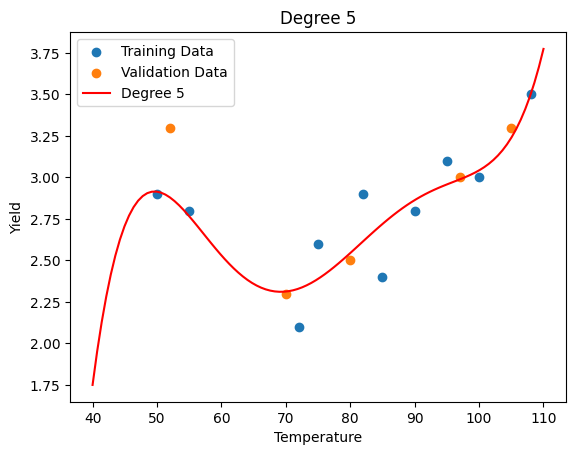

Coefficients: [-3.03505623e-13  1.89865640e-10 -4.84073968e-08  5.96529174e-06
 -2.22084145e-04 -3.65021538e-02  6.13397531e+00 -4.38697708e+02
  1.74758496e+04 -3.77989748e+05  3.47605967e+06]
Training Cost: 6.52891143814734e-14
Validation Cost: 69.81710448025699


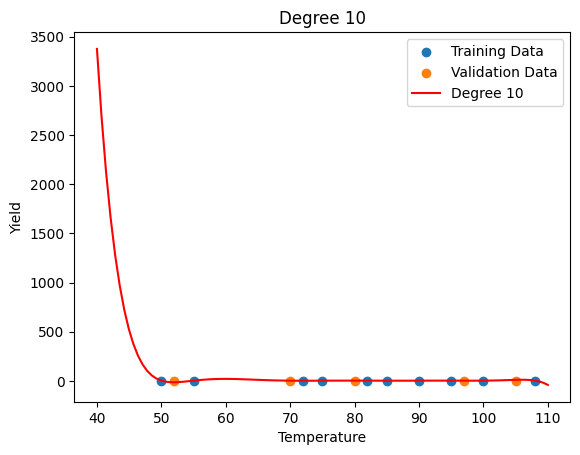

Coefficients: [-2.22722500e-24  6.93852054e-22 -3.62997024e-20 -5.96635450e-18
  1.18299501e-16  6.65086363e-14  2.92647532e-12 -5.23626431e-10
 -6.31538389e-08  2.49200256e-06  7.84595704e-04 -1.55891468e-02
 -8.34467453e+00  7.45361022e+02 -2.52635247e+04  3.14718285e+05]
Training Cost: 9.926562152362186e-18
Validation Cost: 46.330788040621414


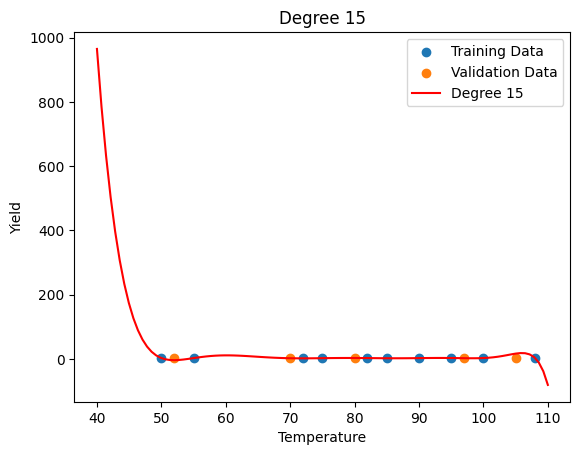

In [2]:

# Data
temperature = np.array([52, 55, 50, 70, 75, 72, 80, 82, 85, 97, 95, 90, 105, 108, 100])
yield_data = np.array([3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3.0, 3.1, 2.8, 3.3, 3.5, 3.0])

# Indices for validation set
data_points = [1,4,7,10,13]
validation_indices = [x-1 for x in data_points]

# Create training and validation sets
x_train = np.delete(temperature, validation_indices)
y_train = np.delete(yield_data, validation_indices)
x_validation = temperature[validation_indices]
y_validation = yield_data[validation_indices]

def polynomial_regression(x_train, y_train, x_validation, y_validation, degree):
    
    mymodel = np.poly1d(np.polyfit(x_train, y_train, degree))
    
    train_predictions = mymodel(x_train)
    validation_predictions = mymodel(x_validation)

    # MSE
    train_cost = mean_squared_error(y_train, train_predictions)
    validation_cost = mean_squared_error(y_validation, validation_predictions)

    return mymodel, train_cost, validation_cost

degrees = [1, 3, 5, 10, 15]

for m in degrees:
    
    model, train_cost, validation_cost = polynomial_regression(x_train, y_train, x_validation, y_validation, m)
    
    print(f"Coefficients: {model.coefficients}")
    print(f"Training Cost: {train_cost}")
    print(f"Validation Cost: {validation_cost}")

    plt.figure()
    plt.scatter(x_train, y_train, label="Training Data")
    plt.scatter(x_validation, y_validation, label="Validation Data")

    myline = np.linspace(40, 110, 100)
    plt.plot(myline, model(myline), color='red', label=f"Degree {m}")

    plt.xlabel("Temperature")
    plt.ylabel("Yield")
    plt.title(f"Degree {m}")
    plt.legend(loc='best')
    plt.show()


e. Degree 3 is the best model because it has low training and validation cost. It is also not over or under-fitting.

3. 
a.

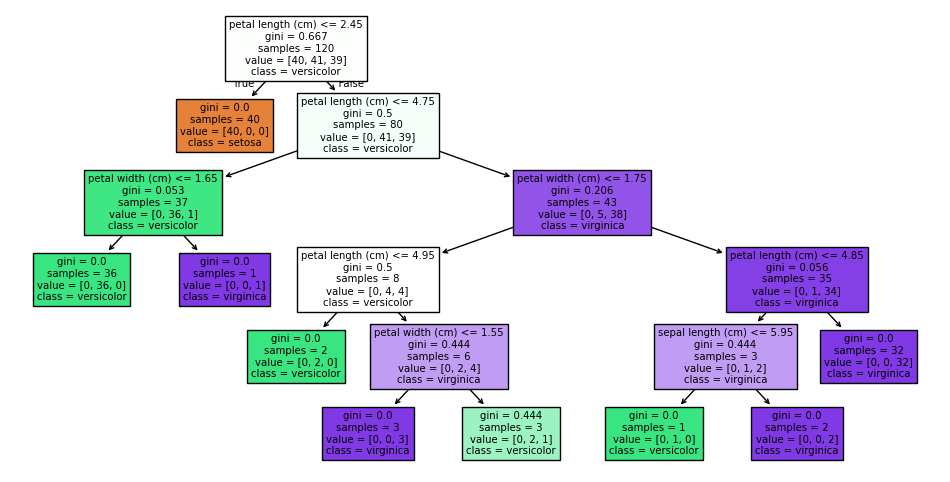

Accuracy on Iris dataset: 1.00


In [3]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

data = DecisionTreeClassifier(max_depth=5) 
data.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(data, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

y_pred = data.predict(X_test)
print(f"Accuracy on Iris dataset: {accuracy_score(y_test, y_pred):.2f}")


b.

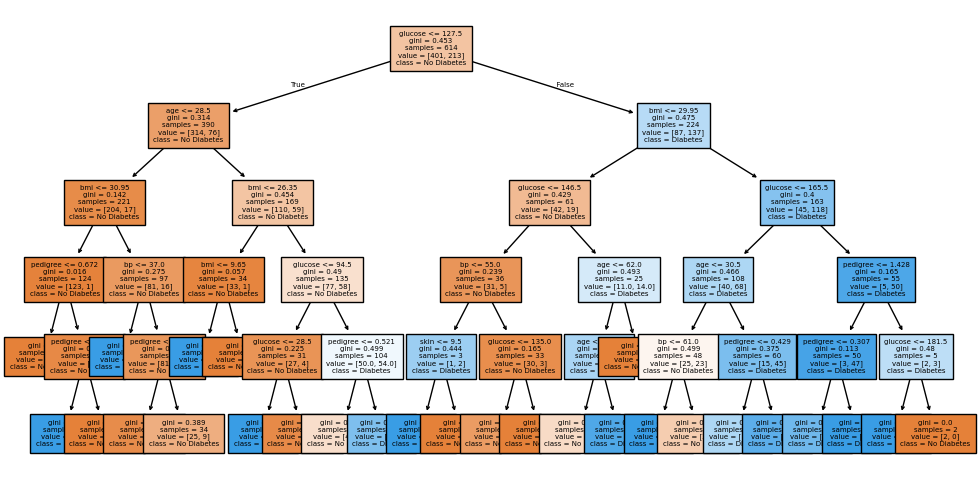

Accuracy on Diabetes dataset: 0.79


In [4]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)

X_d = pima.drop(columns=['label'])  # Features
y_d = pima['label']  # Target

# Split dataset (80% training, 20% testing)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=42)

dt_d = DecisionTreeClassifier(max_depth=5)
dt_d.fit(X_train_d, y_train_d)
y_pred_dt_d = dt_d.predict(X_test_d)

plt.figure(figsize=(12, 6))
plot_tree(dt_d, feature_names=col_names[:-1], class_names=['No Diabetes', 'Diabetes'],fontsize=5, filled=True)
plt.show()

# Evaluate the model
print(f"Accuracy on Diabetes dataset: {accuracy_score(y_test_d, y_pred_dt_d):.2f}")




4.

1.

    P(Yes) == 5/10
    P(No) == 5/10

    P(Red|Yes) == 3/5
    P(Red|No) == 2/5

    P(SUV|Yes) == 1/5
    P(SUV|No) == 3/5

    P(Domestic|Yes) == 2/5
    P(Domestic|No) == 3/5

    P(Stolen) == P(Yes) * P(Red|Yes) * P(SUV|Yes) * (Domestic|Yes)
    p(Stolen) ==  5/10 * 3/5 * 1/5 * 2/5 == 0.024

    P(Not Stolen) == P(No) * P(Red|No) * P(SUV|No) * (Domestic|No)
    P(Not Stolen) == 5/10 * 2/5 * 3/5 * 3/5 == 0.072

2.
a.

    P(LC=T) == 0.15+0.125+0.1+0.2 == 0.575
    P(HW=T) == 0.15+0.15+0.05+0.1 == 0.45

    P(LC=T and HW=T) == 0.15+0.1 == 0.25

    P(LC=T)*P(HW=Y) == 0.575*0.45 == 0.259

    Because P(LC=T)*P(HW=Y) != P(LC=T and HW=T), “Person X likes coding” and “person X is hard-working” is not independent

b.

    P(LC=T|GSU=T) == P(LC=T,GSU=T)/P(GSU=T) == (0.15+0.125) / (0.15+0.125+0.05+0.1) == 0.647
    P(HW=T|GSU=T) == P(HW=T,GSU=T)/P(GSU=T) == (0.15+0.05) / (0.15+0.125+0.05+0.1) == 0.471

    P(LC=T|GSU=T) * P(HW=T|GSU=T) == 0.647 * 0.471 == 0.305

    P(LC=T,HW=T|GSU=T) == P(LC=T,HW=T,GSU=T)/P(GSU=T) == 0.15/(0.15+0.125+0.05+0.1) == 0.353

    Because P(LC=1,HW=T|GSU=T) != P(LC=T|GSU=T) * P(HW=T|GSU=T), therefore, “person X likes coding” is not conditionally independent of “person X is hardworking” given “person X attends GSU”


c.

P(HW=T|GSU=T) == P(HW=T,GSU=T)/P(GSU=T) == (0.15+0.05) / (0.15+0.125+0.05+0.1) == 0.471

The probability of a hardworking student who attend GSU is 47%
